
# Data Mining Project

## Stock Analysis


The object of this project is to analyze the new the related to the stock market, and see what it will affect to the stock prices. For example, if a new come out, the price is going to increase or decrease. In this project, we are focusing on analysing the new and stock price that how both of them are related.



In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import itertools
import matplotlib

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
stock_names = ['PTT', 'THAI', 'NOK']
date_list = [['18/01/2017','21/01/2017', '25/01/2017', '26/01/2017'],
             ['10/02/2017','21/02/2017'], ['19/01/2017','15/02/2017','6/10/2016']]

## Get all the data in html pages

In this function, i use requests to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows you to access the response data of Python in the same way.


Beautiful Soup = a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 

In this project i use the website www.set.or.th in order to get the stock prices. The benefit of this web-site is that it provides many different type of data. However, the data is always fresh, it means that you cannot get the old stock price detail.

- Example of the link : https://www.set.or.th/set/historicaltrading.dosymbol=BA&page=0&language=en&country=US&type=trading


In [14]:
def get_html_detail(each_stock):
    #this function is to get all html code in www.set.or.th
    page_number = 0
    all_data = []
    for i in range(0,3):
        url_front = 'https://www.set.or.th/set/historicaltrading.do?symbol='
        page = '&page='
#         url_bottom = '&language=th&country=TH&type=trading'#Thia
        url_bottom ='&language=en&country=US&type=trading'#Eng
        url = url_front+each_stock+page+str(i)+url_bottom

        print url
        b = requests.get(url).text
        soup = BeautifulSoup(b, 'lxml') #this to get all info in that url
        a = get_detail(soup, all_data)
        all_data.append(a)
    all_data = list(itertools.chain.from_iterable(all_data)) #this is to join list of lists
    return all_data

data = get_html_detail('PTT')
data[:5]

https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=0&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=1&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=2&language=en&country=US&type=trading


[[u'17/03/2017',
  u'398.00',
  u'399.00',
  u'396.00',
  u'396.00',
  u' -1.00',
  u' -0.25',
  u'5,345,329',
  u'2,121,524.50'],
 [u'16/03/2017',
  u'400.00',
  u'400.00',
  u'395.00',
  u'397.00',
  u' +2.00',
  u' +0.51',
  u'6,878,680',
  u'2,733,555.06'],
 [u'15/03/2017',
  u'397.00',
  u'398.00',
  u'395.00',
  u'395.00',
  u' -2.00',
  u' -0.50',
  u'4,639,446',
  u'1,837,858.49'],
 [u'14/03/2017',
  u'394.00',
  u'398.00',
  u'391.00',
  u'397.00',
  u' +3.00',
  u' +0.76',
  u'8,484,735',
  u'3,347,898.72'],
 [u'13/03/2017',
  u'390.00',
  u'394.00',
  u'388.00',
  u'394.00',
  u' +4.00',
  u' +1.03',
  u'4,033,474',
  u'1,579,723.45']]

## Build the DataFrame


I use DataFrame from pandas to make a 2-dimensional data

In [22]:
def build_data_frame(data):
    values = np.array(data)        
    labels = ['Date', 'Open Price', 'Hidhest Price','Lowest Price','Close Price', 'Change', 'Percent Change','Overall', 'Overall Baht' ]
    data = seperate_lists(values)
    keep_val = {}
    count = 0
    for j in labels:
        keep_val[j] = data[count]
        count +=1
    table = pd.DataFrame(keep_val, columns=labels)
    original_table = table
    table = table.sort_index(ascending=False)
    table['Date'] = pd.to_datetime(table['Date'], format='%d%m%Y', errors='ignore')
    table = table.set_index(table['Date'])
    return table, original_table
data1, data2 =   build_data_frame(data)
data1[:10]



,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
Date,,,,,,,,,
03/10/2016,03/10/2016,343.00,347.00,342.00,347.00,+8.00,+2.36,"5,042,297","1,742,426.07"
04/10/2016,04/10/2016,348.00,349.00,345.00,346.00,-1.00,-0.29,"6,607,112","2,293,677.16"
05/10/2016,05/10/2016,349.00,349.00,346.00,347.00,+1.00,+0.29,"3,678,780","1,277,905.07"
06/10/2016,06/10/2016,349.00,350.00,347.00,347.00,0.00,0.00,"4,585,851","1,598,011.17"
07/10/2016,07/10/2016,349.00,350.00,345.00,345.00,-2.00,-0.58,"3,656,909","1,269,834.81"
10/10/2016,10/10/2016,335.00,339.00,331.00,335.00,-10.00,-2.90,"5,945,996","1,997,577.73"
11/10/2016,11/10/2016,340.00,344.00,332.00,337.00,+2.00,+0.60,"8,201,398","2,776,659.75"
12/10/2016,12/10/2016,337.00,340.00,320.00,337.00,0.00,0.00,"20,165,125","6,658,363.33"
13/10/2016,13/10/2016,334.00,338.00,325.00,338.00,+1.00,+0.30,"14,826,442","4,909,873.05"


In [23]:
data2[:10]

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
0,17/03/2017,398.00,399.00,396.00,396.00,-1.00,-0.25,"5,345,329","2,121,524.50"
1,16/03/2017,400.00,400.00,395.00,397.00,+2.00,+0.51,"6,878,680","2,733,555.06"
2,15/03/2017,397.00,398.00,395.00,395.00,-2.00,-0.50,"4,639,446","1,837,858.49"
3,14/03/2017,394.00,398.00,391.00,397.00,+3.00,+0.76,"8,484,735","3,347,898.72"
4,13/03/2017,390.00,394.00,388.00,394.00,+4.00,+1.03,"4,033,474","1,579,723.45"
5,10/03/2017,390.00,391.00,387.00,390.00,0.00,0.00,"3,734,624","1,451,902.51"
6,09/03/2017,391.00,392.00,388.00,390.00,-4.00,-1.02,"4,943,310","1,928,611.16"
7,08/03/2017,389.00,394.00,388.00,394.00,+5.00,+1.29,"6,051,483","2,364,379.09"
8,07/03/2017,388.00,391.00,388.00,389.00,+1.00,+0.26,"4,762,520","1,855,183.70"
9,06/03/2017,395.00,396.00,387.00,388.00,-8.00,-2.02,"8,577,699","3,354,392.52"


## Build Graph

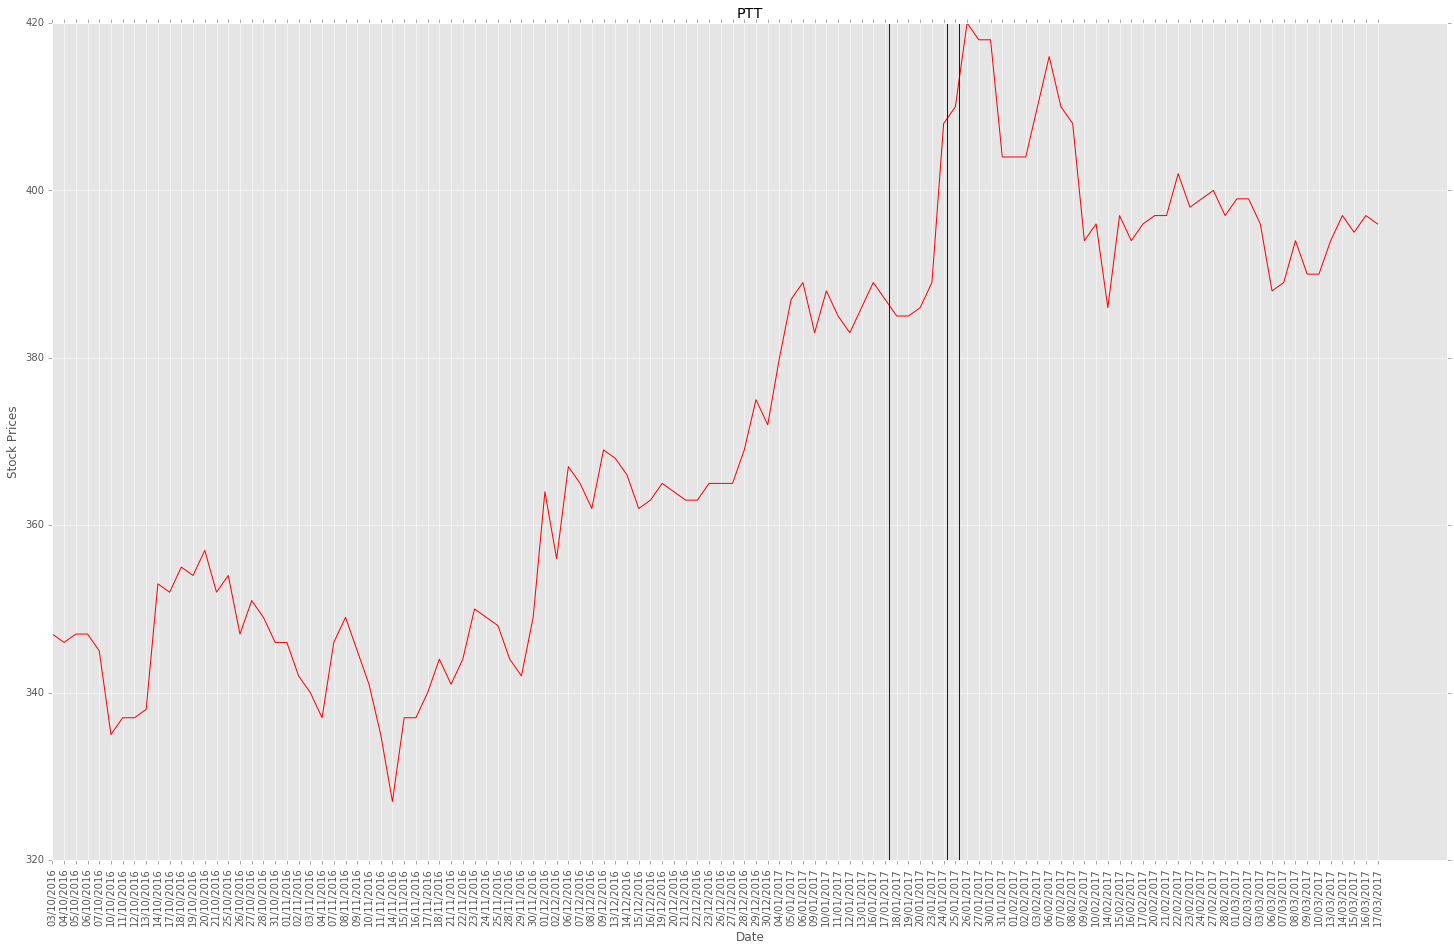

In [24]:
def build_graph(data, name, date_list):
#     labels = ['วันที่', 'ราคาเปิด', 'ราคาสูงสุด','ราคาต่ำสุด','ราคาปิด', 'เปลี่ยนแปลง', '%เปลี่ยนแปลง','ปริมาณรวม(หุ้น)', 'มูลค่ารวม(000 บาท)' ]
    values = np.array(data)
    data = seperate_lists(values)
    length_data = len(data[0])
    dates, prices = find_dot(data, date_list) #Find the point to do dot plot
    x = np.linspace(0, length_data, length_data)
    y = data[4][::-1]
    labels = data[0][::-1]
    plt.figure(figsize=(25,15))
    plt.plot(x, y, 'r')
#     plt.plot(dates, prices, 'ro')
    
    for xc in dates:
        plt.axvline(x=xc)
        
    plt.xticks(x, labels, rotation='vertical')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.figure()
    
build_graph(data,'PTT', date_list[0])

## This is where we start

In [ ]:
def main(stock_names, date_list):
    count = 0
    for each_stock in stock_names:
        data = get_html_detail(each_stock)
        create_data_frame, original_table = build_data_frame(data)
        create_graph = build_graph(data, each_stock, date_list[count]) #plot graph using matplotlib
#         create_graph_dataFrame = build_graph_dataFrame(create_data_frame, each_stock)
        # we need point (x,y) to plot on the graph which is x = date & y = close price
        count += 1
    return create_data_frame

## All functions

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
Date,,,,,,,,,
03/10/2016,03/10/2016,17.70,17.90,17.70,17.80,+0.20,+1.14,"13,451,588","239,184.06"
04/10/2016,04/10/2016,17.80,18.40,17.80,18.40,+0.60,+3.37,"62,836,270","1,140,801.30"
05/10/2016,05/10/2016,18.40,18.50,18.20,18.30,-0.10,-0.54,"42,996,303","788,015.42"
06/10/2016,06/10/2016,18.30,18.40,18.10,18.20,-0.10,-0.55,"34,072,784","621,605.44"
07/10/2016,07/10/2016,18.10,18.20,17.90,17.90,-0.30,-1.65,"38,859,836","700,486.22"
10/10/2016,10/10/2016,17.50,17.70,17.40,17.50,-0.40,-2.23,"74,467,050","1,304,343.10"
11/10/2016,11/10/2016,17.70,17.70,17.30,17.40,-0.10,-0.57,"56,337,252","982,971.80"
12/10/2016,12/10/2016,17.40,17.40,16.60,17.00,-0.40,-2.30,"166,675,023","2,833,248.28"
13/10/2016,13/10/2016,16.90,17.20,16.70,17.10,+0.10,+0.59,"74,354,508","1,255,438.30"


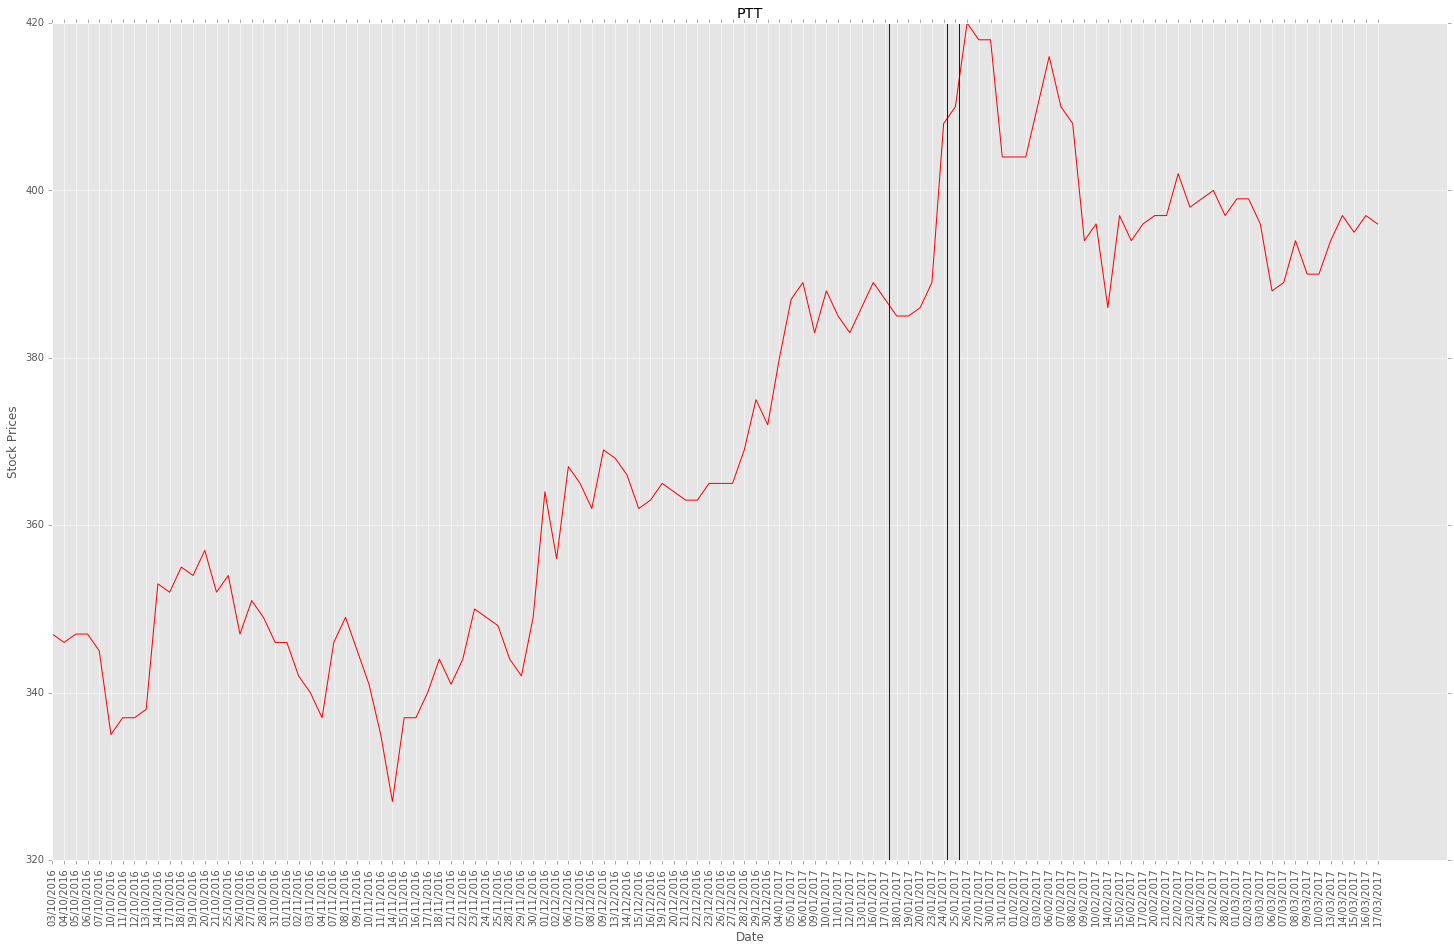

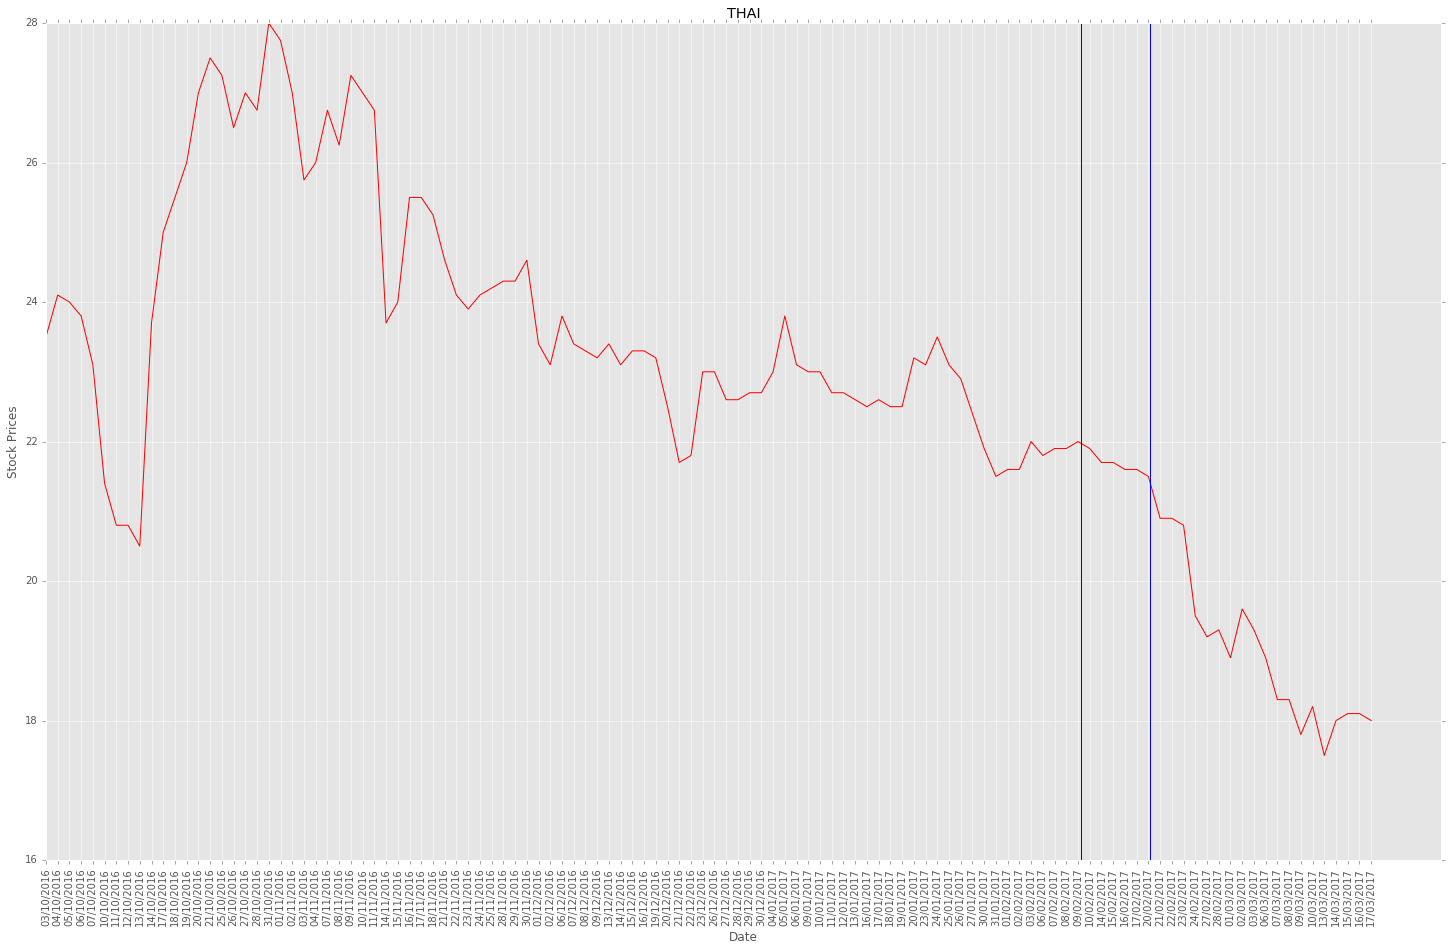

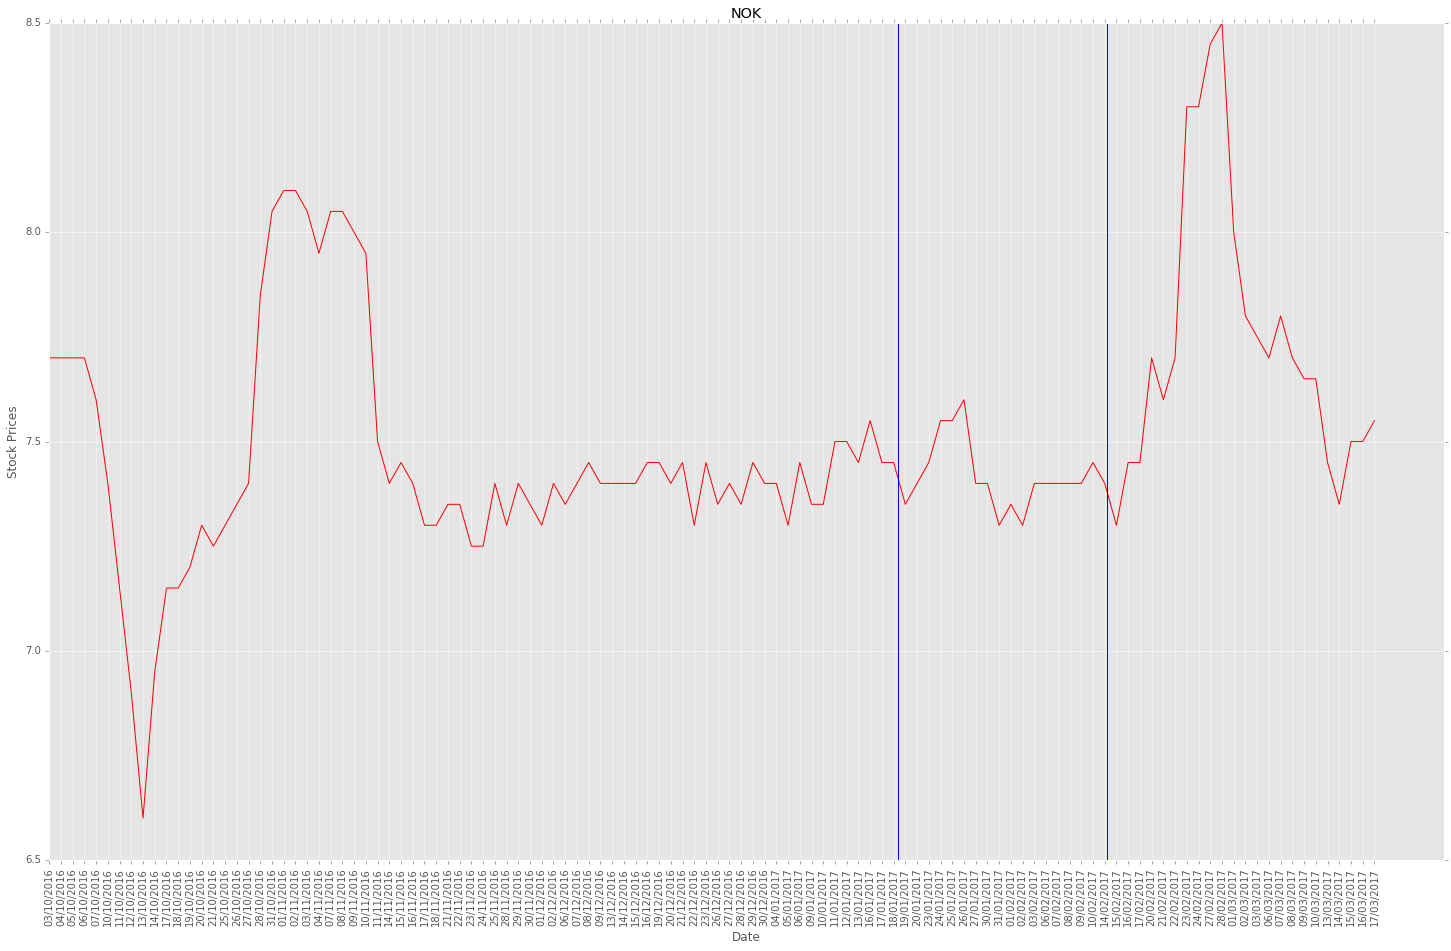

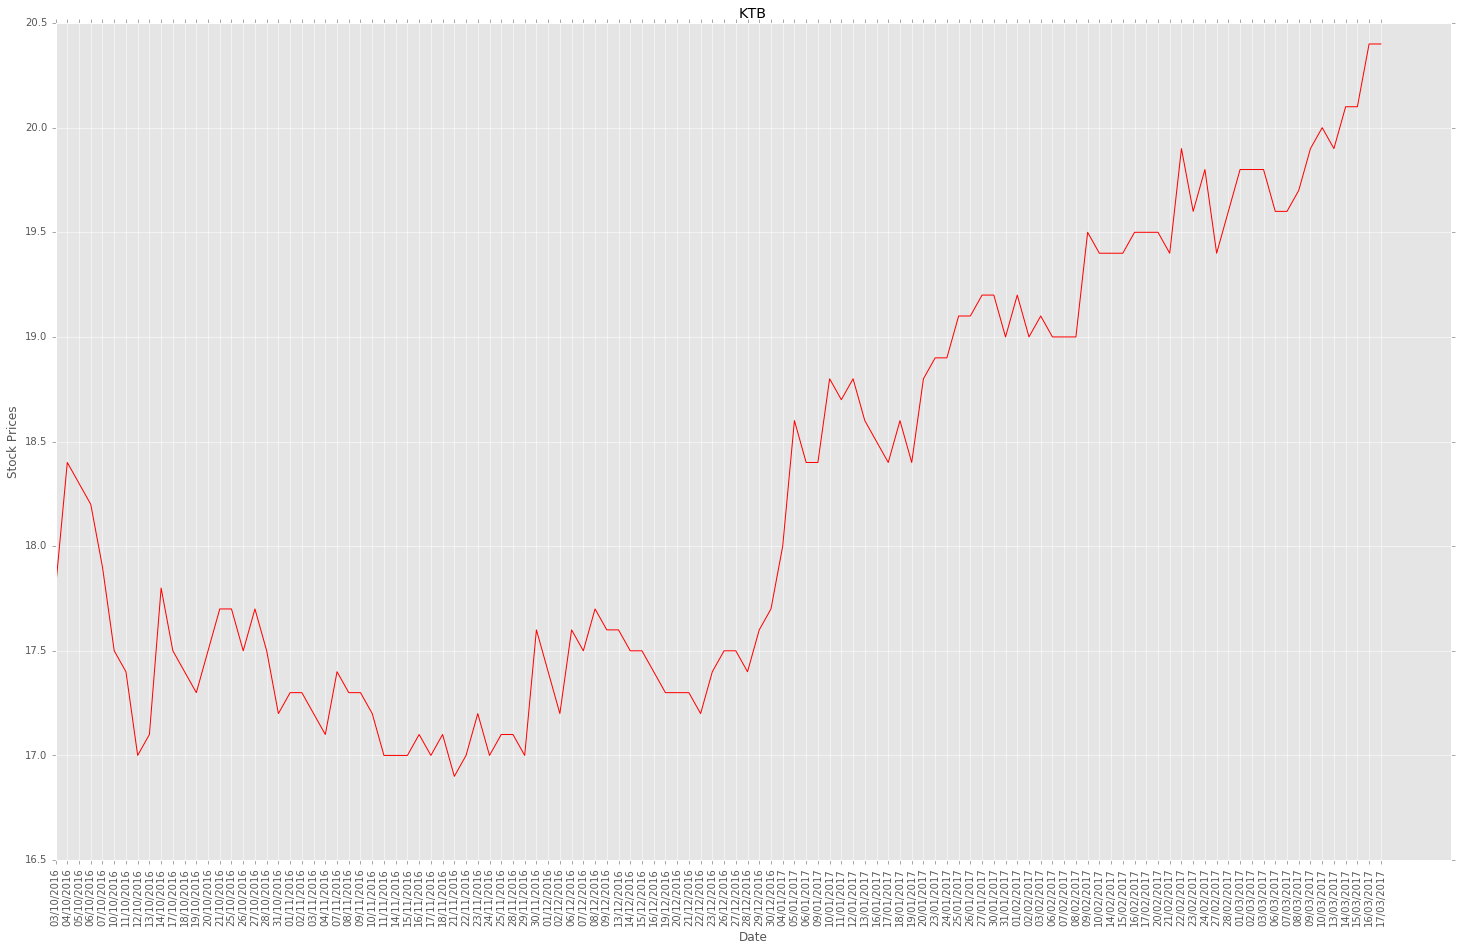

In [25]:
# stock_names = ['BA','AJD', 'ACAP', 'THAI', 'NOK', 'PTT']
stock_names = ['PTT', 'THAI', 'NOK', 'KTB']
date_list = [['18/01/2017','21/01/2017', '25/01/2017', '26/01/2017'],
             ['10/02/2017','21/02/2017'], 
             ['19/01/2017','15/02/2017','6/10/2016'],
             []
            ]

def find_dot(data, date_list):
    dates = []
    lowest_price_list = []
    date = data[0][::-1]
    lowest_price = data[3][::-1]
    for each_date in date_list:
        if each_date in date:
            find_date_index = date.index(each_date)
            dates.append(find_date_index)
            lowest_price_list.append(lowest_price[find_date_index])
    return dates, lowest_price_list

def seperate_lists(values):
    data = [[],[],[],[],[],[],[],[],[]]
    for i in values:
        data[0].append(i[0])
        data[1].append(i[1])
        data[2].append(i[2])
        data[3].append(i[3])
        data[4].append(i[4])
        data[5].append(i[5])
        data[6].append(i[6])
        data[7].append(i[7])
        data[8].append(i[8])
    return data

def build_data_frame(data):
    values = np.array(data)        
    labels = ['Date', 'Open Price', 'Hidhest Price','Lowest Price','Close Price', 'Change', 'Percent Change','Overall', 'Overall Baht' ]
    data = seperate_lists(values)
    keep_val = {}
    count = 0
    for j in labels:
        keep_val[j] = data[count]
        count +=1
    table = pd.DataFrame(keep_val, columns=labels)
    original_table = table
    table = table.sort_index(ascending=False)
    table['Date'] = pd.to_datetime(table['Date'], format='%d%m%Y', errors='ignore')
    table = table.set_index(table['Date'])
    return table, original_table

def build_graph(data, name, date_list):
    values = np.array(data)
    data = seperate_lists(values)
    length_data = len(data[0])
    dates, prices = find_dot(data, date_list) #Find the point to do dot plot
    x = np.linspace(0, length_data, length_data)
    y = data[4][::-1]
    labels = data[0][::-1]
    plt.figure(figsize=(25,15))
    plt.plot(x, y, 'r')    
    for xc in dates:
        plt.axvline(x=xc)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.figure()
    
def build_graph_dataFrame(data, each_stock):
    table2=data['Close Price'].astype(float)
    table2.plot(title=each_stock, figsize=(15, 7))
    plt.xticks(rotation='vertical')
    plt.figure()
        


def get_detail(soup, all_data):
    # this function will loop each line in html to get the prices
    all_prices = []
    for i in soup.find_all('tr'): #loop all tr in that page
        each_prices =[]
        for j in i.find_all('td'): #loop all td in that page in tr
            each_prices.append(j.get_text())     
        all_prices.append(each_prices)
    all_prices = all_prices[1:] # cut of the first empty list
    return all_prices


def get_html_detail(each_stock):
    #this function is to get all html code in www.set.or.th
    page_number = 0
    all_data = []
    for i in range(0,3):
        url_front = 'https://www.set.or.th/set/historicaltrading.do?symbol='
        page = '&page='
#         url_bottom = '&language=th&country=TH&type=trading'#Thia
        url_bottom ='&language=en&country=US&type=trading'#Eng
        url = url_front+each_stock+page+str(i)+url_bottom
        b = requests.get(url).text
        soup = BeautifulSoup(b, 'lxml') #this to get all info in that url
        a = get_detail(soup, all_data)
        all_data.append(a)
    all_data = list(itertools.chain.from_iterable(all_data)) #this is to join list of lists
    return all_data

def main(stock_names, date_list):
    count = 0
    for each_stock in stock_names:
        data = get_html_detail(each_stock)
        create_data_frame, original_table = build_data_frame(data)
        create_graph = build_graph(data, each_stock, date_list[count]) #plot graph using matplotlib
        #create_graph_dataFrame = build_graph_dataFrame(create_data_frame, each_stock)
        # we need point (x,y) to plot on the graph which is x = date & y = close price
        count += 1
    return create_data_frame


    
    
ans = main(stock_names, date_list)
ans


